## Pochodne funkcji wielu zmiennych 

Obliczanie gradientu numeryczne i interpolacja. Poprawne traktowanie argumentów.




In [1]:
import numpy as np
x1d = np.linspace(-2,1,40)
y1d = np.linspace(-1,3,34)
dx = x1d[1]-x1d[0]
dy = y1d[1]-y1d[0]

X,Y = np.meshgrid(x1d,y1d)

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import display

In [5]:
import sympy
from sympy.abc import x,y
sympy.init_printing(use_latex='mathjax')

     2      2
  - x  - 2⋅y 
-ℯ           

<IPython.core.display.Javascript object>


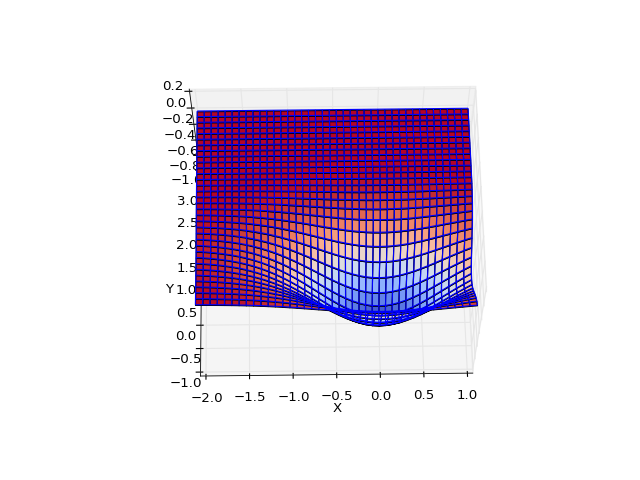

In [7]:
f_symb = -sympy.exp(-(x**2+2*y**2))
display(f_symb)

F = sympy.lambdify((x,y),f_symb,np)
Fx = sympy.lambdify((x,y),f_symb.diff(x),np)
Fy = sympy.lambdify((x,y),f_symb.diff(y),np)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X,Y,F(X,Y)+0.01)
ax.plot_surface(X, Y, F(X,Y), cmap=cm.coolwarm,rstride=1,cstride=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [5]:
# %matplotlib inline

<IPython.core.display.Javascript object>


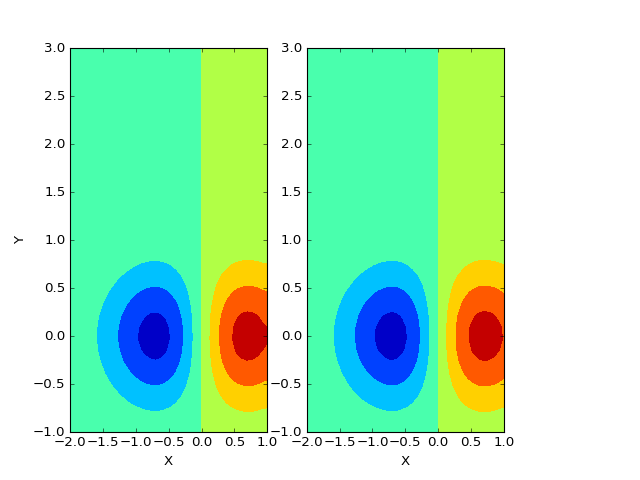

In [12]:
f,ax = plt.subplots(1,2)
f.set_figwidth(7)

Fx_num = F(X,Y)
Fx_num = 1/dx*np.gradient(Fx_num,axis=1)
ax[0].contourf(X,Y,Fx_num)
ax[1].contourf(X, Y, Fx(X,Y) )
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[0].set_ylabel('Y')
#display(f)

In [13]:
import scipy as sp
from scipy import interpolate


In [14]:
Finterp = interpolate.interp2d(X.flatten(),Y.flatten(),F(X,Y).flatten())


In [15]:
Finterp(x1d,y1d).shape

(34, 40)

<IPython.core.display.Javascript object>


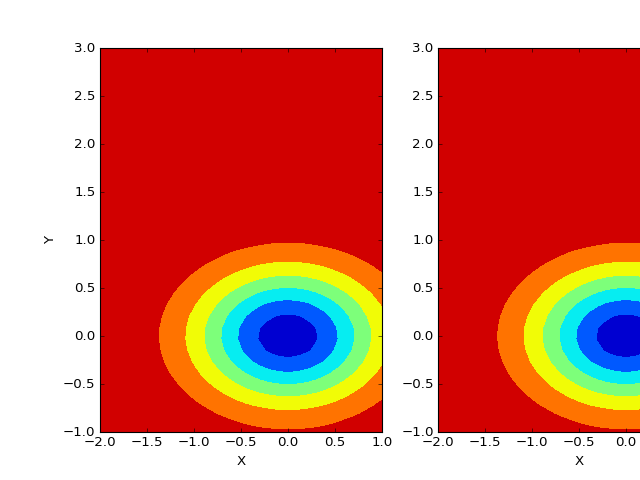

In [16]:
f,ax = plt.subplots(1,2)
f.set_figwidth(10)

Finterp = interpolate.interp2d(X.flatten(),Y.flatten(),F(X,Y).flatten())
ax[0].contourf(X,Y,Finterp(x1d,y1d))
ax[1].contourf(X, Y, F(X,Y) )
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[0].set_ylabel('Y')
#display(f)

<IPython.core.display.Javascript object>


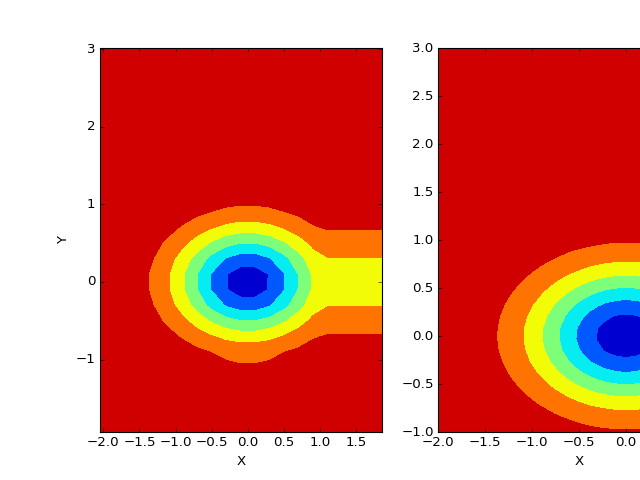

In [21]:
f,ax = plt.subplots(1,2)
f.set_figwidth(10)

Finterp = interpolate.interp2d(X.flatten(),Y.flatten(),F(X,Y).flatten())
x1d = np.linspace(-10,10,100)
y1d = np.linspace(-10,10,100)
X2,Y2 = np.meshgrid( x1d,y1d)
ax[0].contourf(X2,Y2,Finterp(x1d,y1d))
ax[1].contourf(X, Y, F(X,Y) )
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[0].set_ylabel('Y')
#display(f)

In [19]:
Finterp(1,223)

array([ -5.60279644e-09])

In [14]:

f_symb = sympy.sin(x**2/4+y**2)
expr = sympy.diff(f_symb,x)
display(f_symb)

F = sympy.lambdify((x,y),f_symb,np)
Fx = sympy.lambdify((x,y),f_symb.diff(x),np)
Fy = sympy.lambdify((x,y),f_symb.diff(y),np)



   ⎛ 2     ⎞
   ⎜x     2⎟
sin⎜── + y ⎟
   ⎝4      ⎠